# CART

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

### DATASET

In [3]:
df = pd.read_csv("C://Users//ertug//Desktop//Machine_Learning_Courses//_3_Classification//diabetes.csv//diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]

In [6]:
X = df.drop(["Outcome"], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=.3,
                                                    random_state=42)

### Model & Training

In [8]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [9]:
y_pred = cart_model.predict(X_test)

In [10]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5543999525246258

In [11]:
accuracy_score(y_test, y_pred)

0.6926406926406926

In [12]:
r2_score(y_test, y_pred)

-0.3576986754966891

In [13]:
confusion_matrix(y_test, y_pred)

array([[109,  42],
       [ 29,  51]], dtype=int64)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       151
           1       0.55      0.64      0.59        80

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.70       231



In [18]:
cart_model.predict_proba(X_test)[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

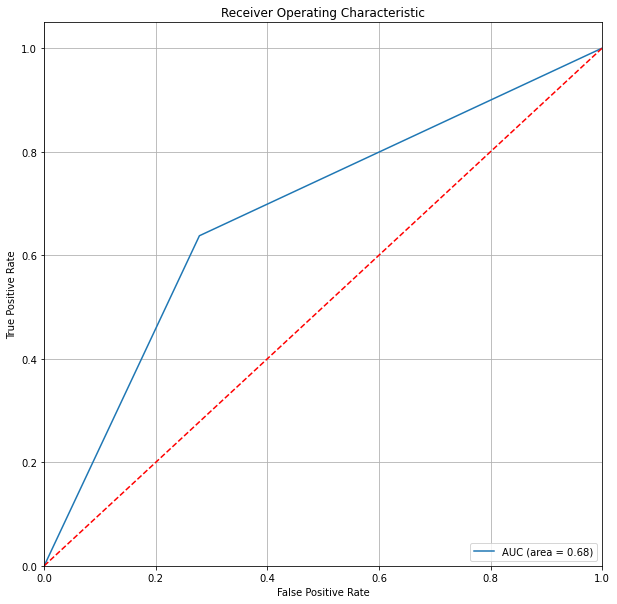

In [21]:
logit_roc_auc = roc_auc_score(y_test, cart_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cart_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.grid(1)
plt.show()

### MODEL TUNING

In [22]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [25]:
cart_params = {"max_depth": [1, 3, 5, 8, 10],
               "min_samples_split": [1, 3, 5, 10, 20]}

In [26]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    8.6s finished


In [27]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [28]:
cart_cv_model.best_score_

0.763487071977638

In [30]:
cart_tuned = DecisionTreeClassifier(max_depth=cart_cv_model.best_params_.get("max_depth"),
                                    min_samples_split=cart_cv_model.best_params_.get("min_samples_split")).fit(X_train, y_train)

In [31]:
y_pred = cart_model.predict(X_test)

In [32]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

0.5582905262390825

In [33]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [34]:
r2_score(y_test, y_pred)

-0.3768211920529805

In [35]:
confusion_matrix(y_test, y_pred)

array([[104,  47],
       [ 25,  55]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74       151
           1       0.54      0.69      0.60        80

    accuracy                           0.69       231
   macro avg       0.67      0.69      0.67       231
weighted avg       0.71      0.69      0.69       231



In [38]:
cart_tuned.predict_proba(X_test)[:10]

array([[0.53535354, 0.46464646],
       [0.88607595, 0.11392405],
       [0.99099099, 0.00900901],
       [0.975     , 0.025     ],
       [0.53535354, 0.46464646],
       [0.53535354, 0.46464646],
       [0.99099099, 0.00900901],
       [0.29166667, 0.70833333],
       [0.53535354, 0.46464646],
       [0.53535354, 0.46464646]])

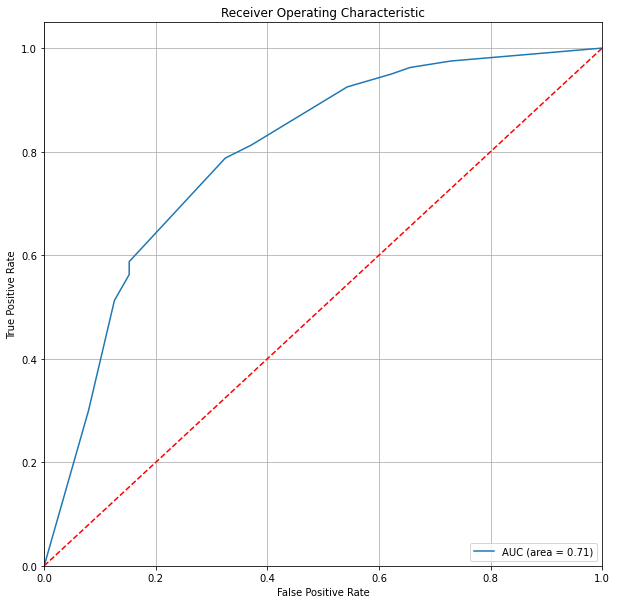

In [39]:
logit_roc_auc = roc_auc_score(y_test, cart_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cart_tuned.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC (area = %.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([.0, 1.0])
plt.ylim([.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.savefig("LOG_ROC")
plt.grid(1)
plt.show()